# Introduction


## Description and discussion of the business problem

In this capstone project we will explore the location data of lyon and will try to answer to a specific question regarding opening a vegan restaurant.
 Paris multi-cultural french city, it is a interesting type of restaurant because it is trendy right now.


The target of this report are **stakeholders** who want to invest in opening a vegetarian restaurant in Paris without knowing the right borough to do it.

The purpose of trying to have a look at Paris's boroughs is to find locations that don't have this type of restaurant, therefore it will be an opportunity for investors. 

By categorizing the boroughs into clusters of venues we will try to answer the business problem of opening a vegetarian restaurant in Paris

## Data description 

For the data retrieving we will set up some criterias :

* Locations that are close to the city center are privileged
* List of restaurants by borough
* list of boroughs with no vegetarian restaurant 
* Trending venues in the area


for those criterias we will need to retrieve multiple data sets :
   * Dataset of Paris Arrondissements 
   * Make a list of those Arrondissements to search the latitude and longitude of those districts using geolocator from geopy
   * Data set of venues from the Foursquare API 
   * Count the number of vegeterian restaurants 
   * Try to identify Arrondissements with low density vegetarian restaurants
   * Vizualise clusters of venues in each borough


In [1]:
# Load needed libraries for data collection

# HTML request and scraper library
import requests
from bs4 import BeautifulSoup

# Geocoding library
#!conda install -c conda-forge geopy --yes # Unquote to install geopy
from geopy.geocoders import ArcGIS # module to convert an address into latitude and longitude values

# Library for data analysis
import pandas as pd
from pandas.io.json import json_normalize # Function to transform json
import numpy as np

#!conda install -c conda-forge folium=0.5.0 --yes # Unquote to install folium
import folium # map plotting library
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import collapsible JSON for exploration
from IPython.display import JSON

# k-means for categorization
from sklearn.cluster import KMeans

# Pretty print
from pprint import pprint

## Data retrieving : Arrondissements of Paris

In [2]:
url="https://en.wikipedia.org/wiki/Arrondissements_of_Paris"

a=requests.session()
rep=a.get(url).text

In [3]:
df=pd.read_html(rep)

In [4]:
neigh=df[1]

In [5]:
neigh

,"Arrondissement (R for Right Bank, L for Left Bank)",Name,Area (km2),Population(2017 estimate),Density (2017)(inhabitants per km2),Peak of population,Mayor (2020-2026)
0,1st(Ier) RAdministratively part of Paris Centre,Louvre,5.59 km2 (2.16 sq mi),100196,17924,before 1861,Ariel Weil (PS)
1,2nd (IIe) RAdministratively part of Paris Centre,Bourse,5.59 km2 (2.16 sq mi),100196,17924,before 1861,Ariel Weil (PS)
2,3rd (IIIe) RAdministratively part of Paris Centre,Temple,5.59 km2 (2.16 sq mi),100196,17924,before 1861,Ariel Weil (PS)
3,4th (IVe) RAdministratively part of Paris Centre,Hôtel-de-Ville,5.59 km2 (2.16 sq mi),100196,17924,before 1861,Ariel Weil (PS)
4,5th (Ve) L,Panthéon,2.541 km2 (0.981 sq mi),59631,23477,1911,Florence Berthout (DVD)
5,6th (VIe) L,Luxembourg,2.154 km2 (0.832 sq mi),41976,19524,1911,Jean-Pierre Lecoq (LR)
6,7th (VIIe) L,Palais-Bourbon,4.088 km2 (1.578 sq mi),52193,12761,1926,Rachida Dati (LR)
7,8th (VIIIe) R,Élysée,3.881 km2 (1.498 sq mi),37368,9631,1891,Jeanne d'Hauteserre (LR)
8,9th (IXe) R,Opéra,2.179 km2 (0.841 sq mi),60071,27556,1901,Delphine Bürkli (DVD)
9,10th (Xe) R,Entrepôt,2.892 km2 (1.117 sq mi),90836,31431,1881,Alexandra Cordebard (PS)


## Data preparation 

In [6]:
neigh1=neigh.drop(['Arrondissement (R for Right Bank, L for Left Bank)','Area (km2)','Population(2017 estimate)','Density (2017)(inhabitants per km2)','Peak of population','Mayor (2020-2026)'],inplace=True,axis=1)

In [7]:
neigh

,Name
0,Louvre
1,Bourse
2,Temple
3,Hôtel-de-Ville
4,Panthéon
5,Luxembourg
6,Palais-Bourbon
7,Élysée
8,Opéra
9,Entrepôt


In [8]:
i=list(neigh['Name'])

In [9]:
i

['Louvre',
 'Bourse',
 'Temple',
 'Hôtel-de-Ville',
 'Panthéon',
 'Luxembourg',
 'Palais-Bourbon',
 'Élysée',
 'Opéra',
 'Entrepôt',
 'Popincourt',
 'Reuilly',
 'Gobelins',
 'Observatoire',
 'Vaugirard',
 'Passy',
 'Batignolles-Monceau',
 'Butte-Montmartre',
 'Buttes-Chaumont',
 'Ménilmontant']

In [10]:
arcg = ArcGIS() #instantiate the geolocator from geopy
subdist_coord = {} 


# Define a function to query coordinates
def get_coord_jkt(addr):
    'Take a list of address and return a dictionary of address-coordinate pair'
    dic = {}
    for i in addr:
        try:
            location = arcg.geocode(i+", Paris") # Query the address geocode with added Paris as a specifier
            print(i, "queried, returned as",location[0]) # Check
            dic[i] = location[1]
        except Exception as E:
            print("ERROR: occured at", i, E)
    print("Query complete, total query:", len(addr))
    return dic

coordparis = get_coord_jkt(i)
pprint(coordparis)

Louvre queried, returned as Louvre
Bourse queried, returned as Bourse
Temple queried, returned as Temple, 3e Arrondissement, Paris, Île-de-France
Hôtel-de-Ville queried, returned as Hôtel de Ville, 75004, 4e Arrondissement, Paris, Île-de-France
Panthéon queried, returned as Panthéon
Luxembourg queried, returned as Le Luxembourg
Palais-Bourbon queried, returned as Palais Bourbon
Élysée queried, returned as Elysee
Opéra queried, returned as A l'Opéra
Entrepôt queried, returned as L'Entrepôt
Popincourt queried, returned as Le Popincourt
Reuilly queried, returned as Rue de Reuilly, 75012, 12e Arrondissement, Paris, Île-de-France
Gobelins queried, returned as Avenue des Gobelins, 75013, 13e Arrondissement, Paris, Île-de-France
Observatoire queried, returned as L'Observatoire
Vaugirard queried, returned as A Vaugirard
Passy queried, returned as Le Paris, Passy, Saône-et-Loire, Bourgogne-Franche-Comté
Batignolles-Monceau queried, returned as Batignolles, Paris, Île-de-France
Butte-Montmartre 

In [11]:
Paris_df = pd.DataFrame.from_dict(coordparis, orient='index', columns=['Latitude','Longitude'])
Paris_df

,Latitude,Longitude
Louvre,48.861020,2.335870
Bourse,48.869100,2.340220
Temple,48.864660,2.364260
Hôtel-de-Ville,48.857101,2.353064
Panthéon,48.846210,2.346110
Luxembourg,48.847580,2.340940
Palais-Bourbon,48.860830,2.318590
Élysée,49.603890,6.131610
Opéra,48.882110,2.327990
Entrepôt,48.842150,2.375990


In [12]:
k = ['Louvre' in i for i in Paris_df.index] 
pd.Series(k)
Paris_df.drop(Paris_df[k].index, inplace=True)

# Convert index to its own column under Arrondissements
Paris_df.reset_index(inplace=True)
Paris_df.columns = ['Arrondissements','Latitude','Longitude']
Paris_df

,Arrondissements,Latitude,Longitude
0,Bourse,48.869100,2.340220
1,Temple,48.864660,2.364260
2,Hôtel-de-Ville,48.857101,2.353064
3,Panthéon,48.846210,2.346110
4,Luxembourg,48.847580,2.340940
5,Palais-Bourbon,48.860830,2.318590
6,Élysée,49.603890,6.131610
7,Opéra,48.882110,2.327990
8,Entrepôt,48.842150,2.375990
9,Popincourt,48.859350,2.376010


In [13]:
Paris = get_coord_jkt(["DKI Paris"])
Parismap = folium.Map(location=Paris["DKI Paris"], zoom_start=11) 

# Add a red circle marker to represent the center of Paris
folium.CircleMarker(
    Paris["DKI Paris"],
    radius=10,
    color='red',
    popup='Paris',
    fill = True,
    fill_color = 'red',
    fill_opacity = 1
    ).add_to(Parismap)

# Add the boroughs as blue circle markers
for subdist, coord in coordparis.items():
    folium.CircleMarker(
        coord,
        radius=5,
        color='blue',
        popup=subdist,
        fill = True,
        fill_color='blue',
        fill_opacity=1
    ).add_to(Parismap)   
    
# display map
Parismap

DKI Paris queried, returned as Paris, Île-de-France
Query complete, total query: 1


## Retrieving Foursquare API venues data

In [14]:
CLIENT_ID = 'XDIRWLF2QFHNDU35554422MK3RBS2DRQQB3GTXZUOBR5VWVZ' # your Foursquare ID
CLIENT_SECRET = 'KF0DCRUMLU0H0EV4VVT535Q3J4HDILDBZPXMTHX1HEHU1XNM' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XDIRWLF2QFHNDU35554422MK3RBS2DRQQB3GTXZUOBR5VWVZ
CLIENT_SECRET:KF0DCRUMLU0H0EV4VVT535Q3J4HDILDBZPXMTHX1HEHU1XNM


In [15]:
latitude = Paris_df['Latitude'][9]
longitude = Paris_df['Longitude'][9]
radius = 1500

In [16]:
from IPython.display import JSON

# define URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)

# send GET request and get recommended venues
results = requests.get(url).json()
print('There are {} recommended venues.'.format(len(results['response']['groups'][0]['items'])))

JSON(results)

There are 100 recommended venues.


<IPython.core.display.JSON object>

In [17]:
def get_category_type(row):
    'A function that extracts the category of the venue in FourSquare JSON'
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


# Get relevant part of FourSquare's explore call JSON
items = results['response']['groups'][0]['items']

dataframe = json_normalize(items) # flatten JSON

# Filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# Filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# Clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

<ipython-input-17-fcb4e43ef645>:17: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframe = json_normalize(items) # flatten JSON


,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,neighborhood,id
0,Monsieur Antoine,Cocktail Bar,17 avenue Parmentier,48.860365,2.378295,"[{'label': 'display', 'lat': 48.86036499418606...",201,75011,FR,Paris,Île-de-France,France,"[17 avenue Parmentier, 75011 Paris, France]",NaN,NaN,580a6f9c38fab07fc1e35cf6
1,Chez Aline,Sandwich Place,85 rue de la Roquette,48.857042,2.378640,"[{'label': 'display', 'lat': 48.85704233113846...",321,75011,FR,Paris,Île-de-France,France,"[85 rue de la Roquette, 75011 Paris, France]",NaN,NaN,50543808c84c7e50721da3a6
2,Comestibles & Marchand de Vins,Restaurant,3 rue du Général Renault,48.861343,2.378424,"[{'label': 'display', 'lat': 48.861343, 'lng':...",283,75011,FR,Paris,Île-de-France,France,"[3 rue du Général Renault, 75011 Paris, France]",NaN,NaN,573f67ed498ed30654a1ab5e
3,La Cave de l'Insolite,French Restaurant,30 rue de la Folie Méricourt,48.862932,2.373174,"[{'label': 'display', 'lat': 48.86293188195969...",449,75011,FR,Paris,Île-de-France,France,"[30 rue de la Folie Méricourt, 75011 Paris, Fr...",NaN,NaN,4bd993210115c9b6f4bf7780
4,Broken Biscuits,Bakery,10 passage Rochebrune,48.861918,2.379967,"[{'label': 'display', 'lat': 48.86191801102676...",407,75011,FR,Paris,Île-de-France,France,"[10 passage Rochebrune, 75011 Paris, France]",NaN,NaN,5585787e498edcdb3d541bd5
5,The Beans on Fire,Café,7 rue du Général Blaise,48.861511,2.378452,"[{'label': 'display', 'lat': 48.86151071742503...",299,75011,FR,Paris,Île-de-France,France,[7 rue du Général Blaise (7 rue du General Ren...,7 rue du General Renault,NaN,55462874498ecd2c30caf823
6,La Robe de la Girafe,French Restaurant,5 rue Froment,48.856709,2.373051,"[{'label': 'display', 'lat': 48.856709, 'lng':...",365,75011,FR,Paris,Île-de-France,France,"[5 rue Froment, 75011 Paris, France]",NaN,NaN,5283e8cf11d2a8e1db3077dd
7,Ebisu Poissonnerie,Fish Market,30 Rue du Chemin Vert,48.858443,2.373027,"[{'label': 'display', 'lat': 48.858443, 'lng':...",240,75011,FR,Paris,Île-de-France,France,"[30 Rue du Chemin Vert, 75011 Paris, France]",NaN,NaN,5b827054c9f907002c363117
8,Atelier des Lumières,Art Museum,38 rue Saint-Maur,48.861659,2.380911,"[{'label': 'display', 'lat': 48.8616586199121,...",441,75011,FR,Paris,Île-de-France,France,"[38 rue Saint-Maur, 75011 Paris, France]",NaN,NaN,5ad06f59febf316801ad0305
9,Biocoop Welcome Bio,Organic Grocery,10 rue Boulle,48.856884,2.372292,"[{'label': 'display', 'lat': 48.85688383375419...",386,75011,FR,Paris,Île-de-France,France,"[10 rue Boulle, 75011 Paris, France]",NaN,NaN,5107b892e4b0d4a05f79bbc6


In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    '''
    A function to pull nearby venues for each of the subdistricts
    Adapted from previous exercise
    '''
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Subdistrict', 
                  'Subdistrict Latitude', 
                  'Subdistrict Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [19]:
Paris_venues_categories = getNearbyVenues(names=Paris_df['Arrondissements'],
                                 latitudes=Paris_df['Latitude'],
                                 longitudes=Paris_df['Longitude'],
                                 radius = 1500)

Paris_venues_categories.head(10)

Bourse
Temple
Hôtel-de-Ville
Panthéon
Luxembourg
Palais-Bourbon
Élysée
Opéra
Entrepôt
Popincourt
Reuilly
Gobelins
Observatoire
Vaugirard
Passy
Batignolles-Monceau
Butte-Montmartre
Buttes-Chaumont
Ménilmontant


,Subdistrict,Subdistrict Latitude,Subdistrict Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bourse,48.8691,2.34022,Karaage-Ya Bourse,48.870150,2.341826,Japanese Restaurant
1,Bourse,48.8691,2.34022,Galerie Vivienne,48.866731,2.339800,Historic Site
2,Bourse,48.8691,2.34022,Place des Victoires,48.865759,2.341219,Plaza
3,Bourse,48.8691,2.34022,ZenZoo – Bar à Thé,48.867021,2.336738,Bubble Tea Shop
4,Bourse,48.8691,2.34022,Max Linder Panorama,48.871384,2.344809,Indie Movie Theater
5,Bourse,48.8691,2.34022,Hôtel des Grands Boulevards,48.870800,2.344886,Hotel
6,Bourse,48.8691,2.34022,BookOff,48.868946,2.335462,Bookstore
7,Bourse,48.8691,2.34022,Aki Café,48.868730,2.336583,Café
8,Bourse,48.8691,2.34022,L'Appartement Sézane,48.869574,2.345060,Women's Store
9,Bourse,48.8691,2.34022,Jardin du Palais Royal,48.864941,2.337728,Garden


In [20]:
Paris_venues_categories.groupby('Subdistrict').count()

,Subdistrict Latitude,Subdistrict Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Subdistrict,,,,,,
Batignolles-Monceau,100,100,100,100,100,100
Bourse,100,100,100,100,100,100
Butte-Montmartre,100,100,100,100,100,100
Buttes-Chaumont,100,100,100,100,100,100
Entrepôt,100,100,100,100,100,100
Gobelins,100,100,100,100,100,100
Hôtel-de-Ville,100,100,100,100,100,100
Luxembourg,100,100,100,100,100,100
Ménilmontant,100,100,100,100,100,100


In [21]:
lowvenue_subdistrict = Paris_venues_categories.groupby('Subdistrict').Venue.count() < 10
lowvenue_subdistrict = list(lowvenue_subdistrict[lowvenue_subdistrict].index)

# duplicate df
Paris_venues = Paris_venues_categories

# Exclude the subdistricts
for i in lowvenue_subdistrict:
    Paris_venues = Paris_venues[Paris_venues.Subdistrict != i]

In [22]:
Paris_venues.groupby('Subdistrict').count()

,Subdistrict Latitude,Subdistrict Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Subdistrict,,,,,,
Batignolles-Monceau,100,100,100,100,100,100
Bourse,100,100,100,100,100,100
Butte-Montmartre,100,100,100,100,100,100
Buttes-Chaumont,100,100,100,100,100,100
Entrepôt,100,100,100,100,100,100
Gobelins,100,100,100,100,100,100
Hôtel-de-Ville,100,100,100,100,100,100
Luxembourg,100,100,100,100,100,100
Ménilmontant,100,100,100,100,100,100


In [23]:
print('There are {} uniques categories.'.format(len(Paris_venues['Venue Category'].unique())))

There are 189 uniques categories.


In [24]:
Parismap_venues = folium.Map(location=Paris["DKI Paris"], zoom_start=11) # generate map centred around the Centre of paris

# add a red circle marker to represent center of Paris
folium.CircleMarker(
    Paris["DKI Paris"],
    radius=10,
    color='red',
    popup='Paris',
    fill = True,
    fill_color = 'red',
    fill_opacity = 1
    ).add_to(Parismap_venues)

# add the subdistritcs as blue circle markers
for subdist, coord in coordparis.items():
    folium.CircleMarker(
        coord,
        radius=5,
        color='blue',
        popup=subdist,
        fill = True,
        fill_color='blue',
        fill_opacity=1
    ).add_to(Parismap_venues)

# add venues to the map as green circle markers
for lat, lng, label, cat in zip(Paris_venues["Venue Latitude"], Paris_venues["Venue Longitude"], 
                                Paris_venues["Venue"], Paris_venues["Venue Category"]):
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label +", " + cat,
        fill=True,
        color='green',
        fill_color='green',
        fill_opacity=0.6
        ).add_to(Parismap_venues)


# display map
Parismap_venues

* **Introduction** where you discuss the business problem and who would be interested in this project.
* **Data** where you describe the data that will be used to solve the problem and the source of the data.
* **Methodology** section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.
* **Results** section where you discuss the results.
* **Discussion** : section where you discuss any observations you noted and any recommendations you can make based on the results.
* **Conclusion** section where you conclude the report.

## Methodology

In [25]:
Paris_onehot = pd.get_dummies(Paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Paris_onehot['Subdistrict'] = Paris_venues['Subdistrict'] 

# move neighborhood column to the first column
fixed_columns = [Paris_onehot.columns[-1]] + list(Paris_onehot.columns[:-1])
Paris_onehot = Paris_onehot[fixed_columns]

Paris_onehot.head()

,Subdistrict,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Trail,Trattoria/Osteria,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Zoo
0,Bourse,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bourse,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bourse,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bourse,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bourse,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
Paris_grouped = Paris_onehot.groupby('Subdistrict').mean().reset_index()
Paris_grouped

,Subdistrict,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Trail,Trattoria/Osteria,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Zoo
0,Batignolles-Monceau,0.00,0.00,0.00,0.00,0.00,0.02,0.01,0.00,0.00,...,0.00,0.00,0.01,0.00,0.00,0.01,0.07,0.00,0.00,0.00
1,Bourse,0.00,0.00,0.01,0.00,0.00,0.00,0.03,0.00,0.01,...,0.00,0.00,0.00,0.01,0.04,0.00,0.02,0.00,0.01,0.00
2,Butte-Montmartre,0.00,0.01,0.00,0.01,0.01,0.00,0.02,0.00,0.00,...,0.00,0.00,0.00,0.00,0.03,0.00,0.03,0.02,0.00,0.00
3,Buttes-Chaumont,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.01,0.00,0.01,0.01,0.01,0.00,0.00,0.00
4,Entrepôt,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,...,0.01,0.00,0.01,0.00,0.01,0.00,0.04,0.00,0.00,0.01
5,Gobelins,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.04,...,0.01,0.00,0.00,0.00,0.00,0.09,0.01,0.00,0.00,0.01
6,Hôtel-de-Ville,0.00,0.00,0.00,0.00,0.00,0.02,0.03,0.00,0.00,...,0.01,0.00,0.00,0.00,0.00,0.01,0.04,0.00,0.00,0.00
7,Luxembourg,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.00,0.00,...,0.01,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00
8,Ménilmontant,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,...,0.00,0.01,0.01,0.00,0.00,0.02,0.04,0.00,0.00,0.00
9,Observatoire,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,...,0.00,0.00,0.00,0.00,0.01,0.02,0.01,0.02,0.00,0.00


In [27]:
num_top_venues = 5

for hood in Paris_grouped['Subdistrict']:
    print("----"+hood+"----")
    temp = Paris_grouped[Paris_grouped['Subdistrict'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Batignolles-Monceau----
                venue  freq
0   French Restaurant  0.15
1               Hotel  0.07
2            Wine Bar  0.07
3  Italian Restaurant  0.05
4              Bistro  0.03


----Bourse----
                           venue  freq
0                          Plaza  0.09
1                          Hotel  0.08
2              French Restaurant  0.05
3                         Bakery  0.05
4  Vegetarian / Vegan Restaurant  0.04


----Butte-Montmartre----
                venue  freq
0   French Restaurant  0.12
1              Bakery  0.09
2  Italian Restaurant  0.06
3                 Bar  0.05
4         Pizza Place  0.04


----Buttes-Chaumont----
               venue  freq
0  French Restaurant  0.12
1                Bar  0.08
2             Bistro  0.06
3         Restaurant  0.06
4               Café  0.04


----Entrepôt----
               venue  freq
0  French Restaurant  0.10
1       Cocktail Bar  0.04
2           Wine Bar  0.04
3             Museum  0.04
4   Pedestrian P

In [28]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [29]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Subdistrict']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Subdistrict'] = Paris_grouped['Subdistrict']

for ind in np.arange(Paris_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Paris_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Subdistrict,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Batignolles-Monceau,French Restaurant,Wine Bar,Hotel,Italian Restaurant,Bistro,Park,Farmers Market,Bar,Bakery,Modern European Restaurant
1,Bourse,Plaza,Hotel,Bakery,French Restaurant,Vegetarian / Vegan Restaurant,Garden,Sandwich Place,Pedestrian Plaza,Art Museum,Café
2,Butte-Montmartre,French Restaurant,Bakery,Italian Restaurant,Bar,Plaza,Bistro,Pizza Place,Japanese Restaurant,Wine Bar,Vegetarian / Vegan Restaurant
3,Buttes-Chaumont,French Restaurant,Bar,Restaurant,Bistro,Café,Park,Pizza Place,Cocktail Bar,Chinese Restaurant,Italian Restaurant
4,Entrepôt,French Restaurant,Museum,Cocktail Bar,Wine Bar,Pedestrian Plaza,Hotel,Bookstore,Bar,Italian Restaurant,Multiplex


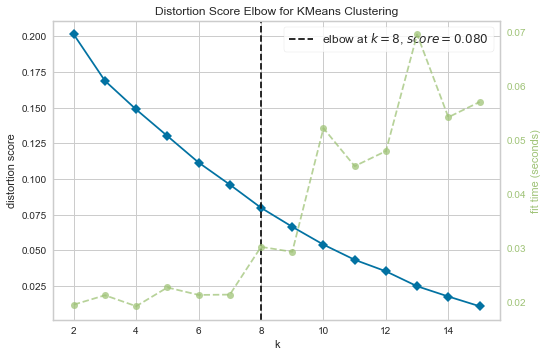

In [39]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
kgc = Paris_grouped_clustering
model = KElbowVisualizer(KMeans(), k=15)
model.fit(kgc)
model.show()

In [32]:
# set number of clusters
kclusters = 15

Paris_grouped_clustering = Paris_grouped.drop('Subdistrict', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([12, 10,  3,  9,  8,  5, 14,  0,  1,  2])

In [33]:
from sklearn.metrics import silhouette_samples, silhouette_score
kgc = Paris_grouped_clustering
max_range = 17
indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    kgc = Paris_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kgc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kgc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)

In [34]:
import matplotlib.pyplot as plt

In [51]:
def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.savefig(r'C:\Users\sofie\Pictures\silhouette.png')
    plt.show()

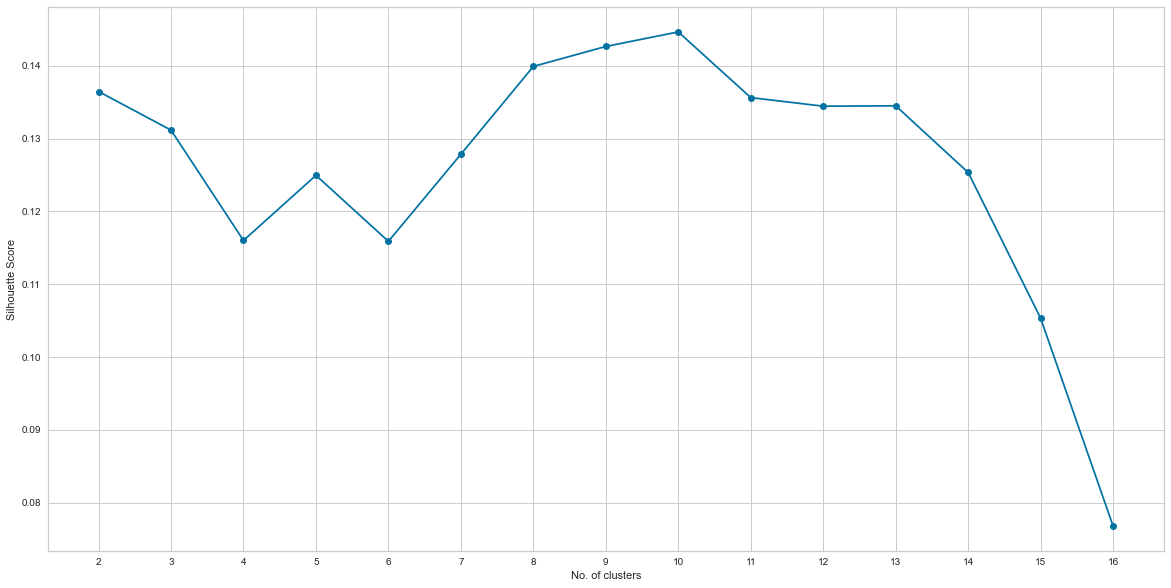

In [52]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

In [50]:
plt.savefig(r'C:\Users\sofie\Pictures\silhouette.png')

<Figure size 576x396 with 0 Axes>

In [37]:
opt = np.argmax(scores) + 2 # Finds the optimal value
opt

10

In [40]:
kclusters = 8 # Result from elbow technique

# Run k-means clustering
kgc = Paris_grouped_clustering
kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit(kgc)

In [ ]:
Paris_merged

In [ ]:
neighborhoods_venues_sorted

In [42]:
#neighborhoods_venues_sorted=neighborhoods_venues_sorted.drop('Cluster Labels',axis=1)

In [43]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
Paris_merged = Paris_df
# drop NA from the excluded subdistrict
for i in lowvenue_subdistrict:
    Paris_merged = Paris_merged[Paris_merged.Arrondissements != i]

In [44]:
# merge df to add latitude/longitude for each subdistrict
Paris_merged = Paris_merged.join(neighborhoods_venues_sorted.set_index('Subdistrict'), on='Arrondissements')

In [45]:
# Shift label to start from index 1
Paris_merged['Cluster Labels'] = Paris_merged['Cluster Labels'] + 1

Paris_merged.head()

,Arrondissements,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bourse,48.869100,2.340220,4,Plaza,Hotel,Bakery,French Restaurant,Vegetarian / Vegan Restaurant,Garden,Sandwich Place,Pedestrian Plaza,Art Museum,Café
1,Temple,48.864660,2.364260,5,Coffee Shop,Bakery,French Restaurant,Restaurant,Italian Restaurant,Bookstore,Clothing Store,Wine Bar,Sandwich Place,Tea Room
2,Hôtel-de-Ville,48.857101,2.353064,4,French Restaurant,Plaza,Coffee Shop,Park,Wine Bar,Garden,Bakery,Pedestrian Plaza,Art Museum,Ice Cream Shop
3,Panthéon,48.846210,2.346110,4,Plaza,French Restaurant,Wine Bar,Ice Cream Shop,Bakery,Garden,Bookstore,Coffee Shop,Café,Fountain
4,Luxembourg,48.847580,2.340940,4,French Restaurant,Plaza,Bakery,Wine Bar,Café,Ice Cream Shop,Garden,Hotel,Bookstore,Bistro


In [46]:
map_clusters = folium.Map(location=Paris["DKI Paris"], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Paris_merged['Latitude'], Paris_merged['Longitude'], Paris_merged['Arrondissements'], Paris_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

In [ ]:
Paris_merged.loc[Paris_merged['Cluster Labels'] == 1, Paris_merged.columns[[0] + list(range(4, Paris_merged.shape[1]))]]


In [ ]:
Paris_merged.loc[Paris_merged['Cluster Labels'] == 2, Paris_merged.columns[[0] + list(range(4, Paris_merged.shape[1]))]]


In [ ]:
Paris_merged.loc[Paris_merged['Cluster Labels'] == 3, Paris_merged.columns[[0] + list(range(4, Paris_merged.shape[1]))]]


In [ ]:
Paris_merged.loc[Paris_merged['Cluster Labels'] == 4, Paris_merged.columns[[0] + list(range(4, Paris_merged.shape[1]))]]


In [ ]:
Paris_merged.loc[Paris_merged['Cluster Labels'] == 5, Paris_merged.columns[[0] + list(range(4, Paris_merged.shape[1]))]]


In [ ]:
Paris_merged.loc[Paris_merged['Cluster Labels'] == 6, Paris_merged.columns[[0] + list(range(4, Paris_merged.shape[1]))]]


In [ ]:
Paris_merged.loc[Paris_merged['Cluster Labels'] == 7, Paris_merged.columns[[0] + list(range(4, Paris_merged.shape[1]))]]


In [ ]:
Paris_merged.loc[Paris_merged['Cluster Labels'] == 8, Paris_merged.columns[[0] + list(range(4, Paris_merged.shape[1]))]]
